
# Investigate No-show appointments



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset collects information
from 100k medical appointments in
Brazil 


In [100]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


In [101]:
#import data 
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# check the data  
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### The questions In this invistagtion based on this data is:
<li> which gender is more not showing for appointment?
<li> Does old or Middle age or young people have the highest number  of problems ?
<li> what is the highest non showing day for appointment?
<li> Does the patience number of problems affects the non showing rate?
<li> Does sms effect the non showing for patience?
<li> who does attend more the  patience who recieve scholarship or not?
<li> which age range is  the most non showing for appointment?
<li> what is the  top 10 Neighbourhood of the patience who didnt show  for appointment?

<a id='wrangling'></a>
## Data Wrangling


In [102]:
# check the data type and know if there is a missing values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [103]:
# Know how many rows and columns in the data
data.shape

(110527, 14)

In [104]:
# check if there is a duplicated values 
data.duplicated().sum()

0

In [105]:
#check some statistics about the data
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [106]:
# Covert AppointmentDay Column to datetime
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


In [107]:
# Extract the Day Name from AppointmentDay column 
data['Apppointment_Day']=data['AppointmentDay'].dt.day_name()

In [108]:
# count the diffrent problems the patience have:
data['Problems_Counts'] = data['Hipertension']+data['Diabetes']+data['Alcoholism']+data['Handcap']

In [109]:
# convert the  0 and 1 to yes or no in the SMs_received column
data['SMS_received'] = data['SMS_received'].apply(lambda x:'Yes' if x==1 else 'No')

In [110]:
# convert the  0 and 1 to yes or no in the Scholarship column
data['Scholarship'] = data['Scholarship'].apply(lambda x:'Yes' if x==1 else 'No')

In [111]:
# Remove  the Uncessary data  to answer the questions 
data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Hipertension','Diabetes','Alcoholism','Handcap'],axis=1,inplace=True)

In [112]:
# create a function to classify the age into three groups: young , middle age  , old
def age_classifier(age):
    if age>55:
        return 'old'
    elif age>=36 and age<=55:
        return 'Middle age'
    else:
        return 'Young'

In [113]:
# create a list to put the classified age in it 
Age_List =[]
for item in data['Age']:
    Age_List.append(age_classifier(item))

In [114]:
# create a new column which contain the list of classified age
data['Age_Classification'] = Age_List

In [115]:
#check the data again 
data.head()

,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,Apppointment_Day,Problems_Counts,Age_Classification
0,F,62,JARDIM DA PENHA,No,No,No,Friday,1,old
1,M,56,JARDIM DA PENHA,No,No,No,Friday,0,old
2,F,62,MATA DA PRAIA,No,No,No,Friday,0,old
3,F,8,PONTAL DE CAMBURI,No,No,No,Friday,0,Young
4,F,56,JARDIM DA PENHA,No,No,No,Friday,2,old


<a id='eda'></a>

## Exploratory Data Analysis

### which gender is more not showing for appointment?

In [116]:
# filter the data for this type of question
Not_showing_Gender = data[data['No-show']=='Yes'].groupby('Gender').size()

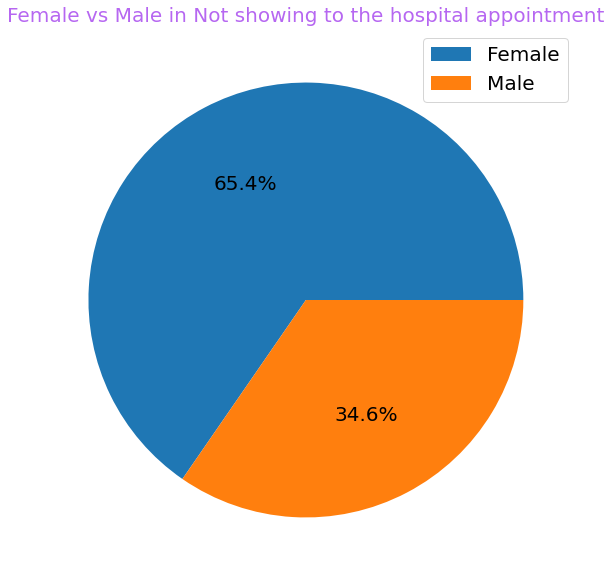

In [117]:
# Make the graph for this question
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20.0
plt.pie(Not_showing_Gender,autopct='%1.1f%%')
plt.title('Female vs Male in Not showing to the hospital appointment',color='#B667F1',size =(20))
labels = ['Female','Male']
plt.legend(labels)
plt.show()

**Female tends to not showing in appointments than male by huge margin**

### Does old or Middle age or young people have the highest number  of problem ?

In [118]:
# Filtered the data to answer the question into 3 groups  old ,  middle age , young
Old_People_Problems =data[(data['Age_Classification']=='old')&(data['Problems_Counts']!=0)].groupby('Problems_Counts').size().sum()
Young_People_Problems =data[(data['Age_Classification']=='Young')&(data['Problems_Counts']!=0)].groupby('Problems_Counts').size().sum()
Middle_Age_People_Problems=data[(data['Age_Classification']=='Middle age')&(data['Problems_Counts']!=0)].groupby('Problems_Counts').size().sum()



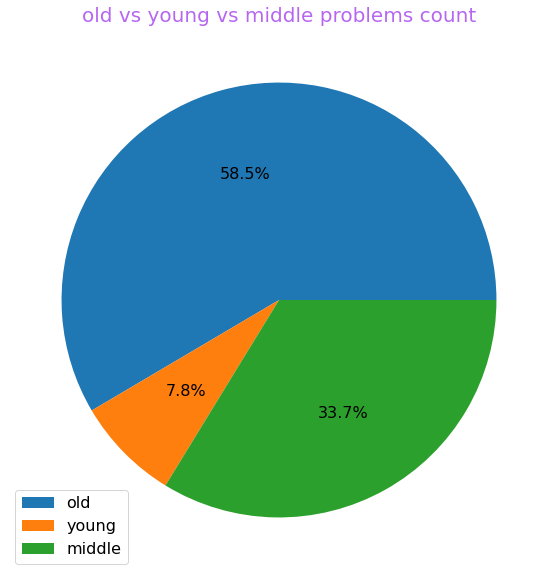

In [119]:
# compine the three variables of ages problems into one for simplicity
diffrent_Ages_Problems=[Old_People_Problems,Young_People_Problems,Middle_Age_People_Problems]
# make a visulization for the data to anwer the question
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 16.0
plt.pie(diffrent_Ages_Problems,autopct='%1.1f%%')
plt.title('old vs young vs middle problems count',color='#B667F1',size =(20))
labels = ['old','young','middle']
plt.legend(labels,loc = 'best')
plt.show()

**Old people have the greatest number of problems by huge margin then middle aged people then young people**

###  what is the highest non showing day for appointment?

In [120]:
# filter the data for this type of question
Appointment_Non_showing_days =data[data['No-show']=='Yes'].groupby('Apppointment_Day').size().sort_values(ascending=False)

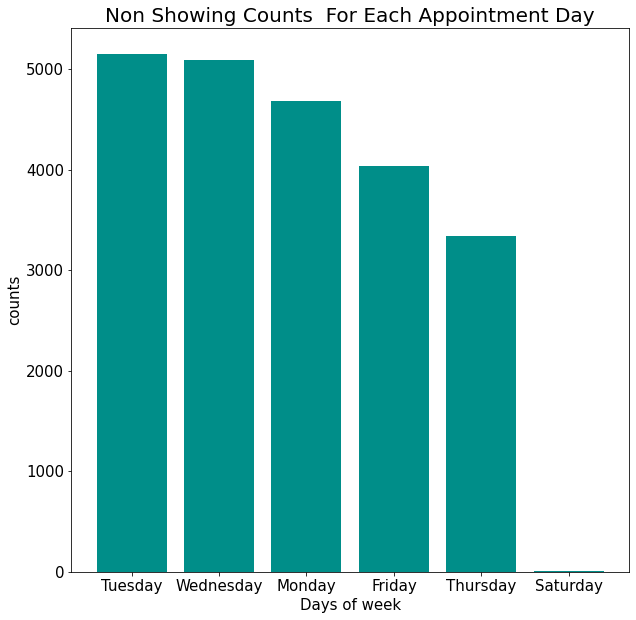

In [121]:
# Make the barchart for the analysis
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 15.0
plt.bar(Appointment_Non_showing_days.index,Appointment_Non_showing_days,color='#008E89')
plt.xlabel('Days of week')
plt.ylabel('counts')
plt.title('Non Showing Counts  For Each Appointment Day',size =(20))
plt.show()

**Tuesday is the highest day for not showing for appointments**

### Does the patience number of problems affects the non showing rate?

In [122]:
# filter the data  for this question
problems_affect = data[data['No-show']=='Yes'].groupby('Problems_Counts').size().sort_values(ascending=False)


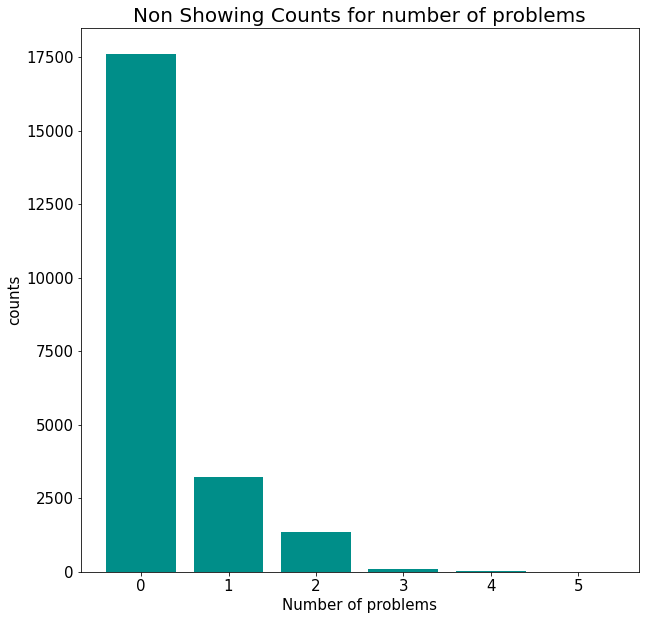

In [123]:
# Make the graph for this question
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 15.0
plt.bar(problems_affect.index,problems_affect,color='#008E89')
plt.xlabel('Number of problems')
plt.ylabel('counts')
plt.title('Non Showing Counts for number of problems',size =(20))
plt.show()


**There is a positive relationship between the number of problems the patience have like diabetes and handicaps an the showing to the appointment for example the patience with 2 problem tend to show than the patience with one**

**The patience with no problems have a great percent for not showing to the appointment**

### who doesnt attend more the  patience who recieve Sms or not?

In [124]:
# filter the data for this question
Received_Sms = data[data['No-show']=='Yes'].groupby('SMS_received').size().sort_values(ascending=False)

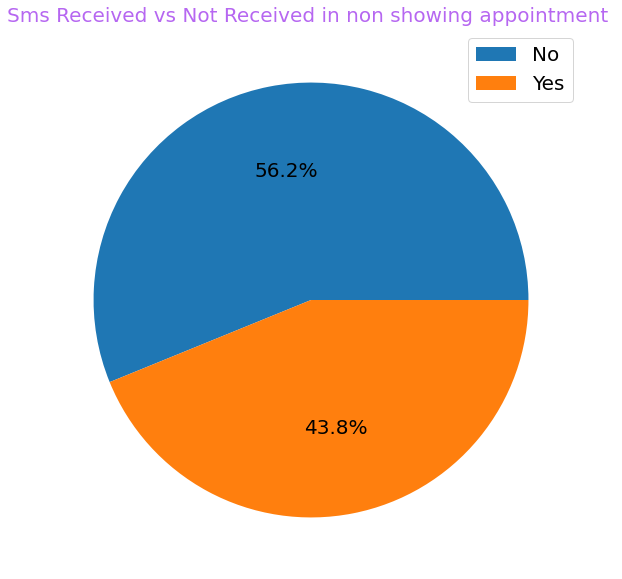

In [125]:
# make the graph for this question
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20.0
plt.pie(Received_Sms,autopct='%1.1f%%')
plt.title('Sms Received vs Not Received in non showing appointment ',color='#B667F1',size =(20))
labels = ['No','Yes']
plt.legend(labels)
plt.show()

**SMS for appointment day has a great effect for increasing the probability the patience will attend the appointment**

###  who doesnt attend more the  patience who recieve scholarship or not?

In [126]:
# filter the data for this question
Received_Scholarship = data[data['No-show']=='Yes'].groupby('Scholarship').size().sort_values(ascending=False)

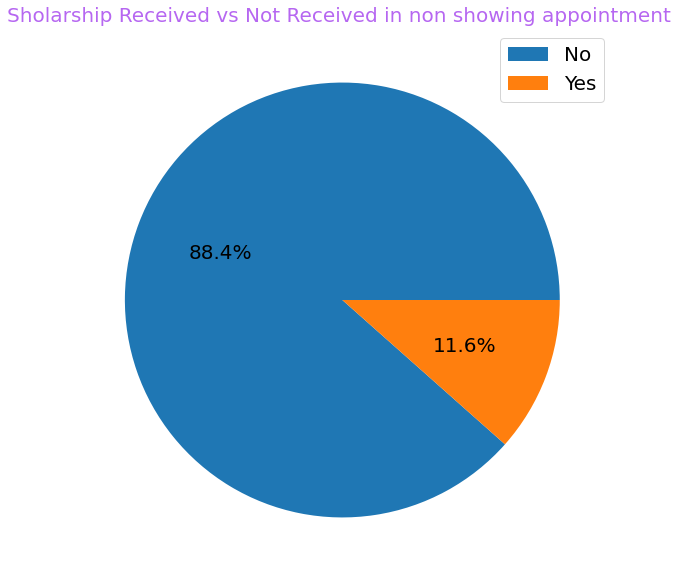

In [127]:
# make a graph for this question
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20.0
plt.pie(Received_Scholarship,autopct='%1.1f%%')
plt.title('Sholarship Received vs Not Received in non showing appointment ',color='#B667F1',size =(20))
labels = ['No','Yes']
plt.legend(labels)
plt.show()

**The patience who have scholarships don't likely miss the appointment while the non scholarship tends to not show**

### which age range is  the most non showing for appointment?

In [128]:
#  filter the graph for this question
No_Showing_Age = data[data['No-show']=='Yes'].groupby('Age').size()

In [129]:
# split the filtered data to groups each group has a rage of 30 to make a comparison
between_0_30 = No_Showing_Age[No_Showing_Age.index<=30].values.sum().tolist()
between_31_60 = No_Showing_Age[(No_Showing_Age.index<=60) & (No_Showing_Age.index>=31)].values.sum().tolist()
between_61_90 = No_Showing_Age[(No_Showing_Age.index<=90) & (No_Showing_Age.index>=61)].values.sum().tolist()
between_91_120 = No_Showing_Age[(No_Showing_Age.index<=120) & (No_Showing_Age.index>=91)].values.sum().tolist()

In [130]:
# put the slices of data into a dictionary inorder to put them in the graph
Age_Range = {'0:30':between_0_30
         ,'31:60:':between_31_60
         ,'61:90':between_61_90
         ,'91:130':between_91_120}


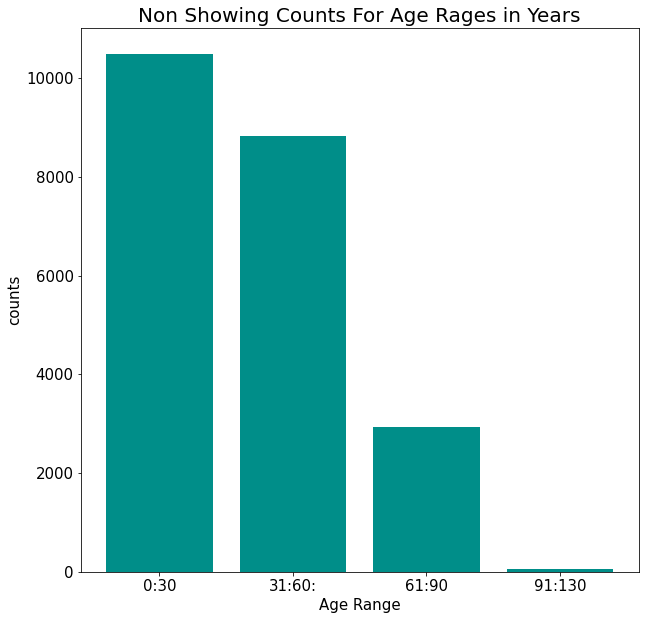

In [131]:
# make the graph for this question
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 15.0
plt.bar(Age_Range.keys(),Age_Range.values(),color='#008E89')
plt.xlabel('Age Range')
plt.ylabel('counts')
plt.title('Non Showing Counts For Age Rages in Years',size =(20))
plt.show()

**People with range of 0:30 are the aged group who don't attend the appointments which are the young people who needs an Awareness**

### what is the  top 10 Neighbourhood of the patience who didnt show  for appointment?

In [132]:
# filtered the data for this question
Non_Show_Neighoburhood = data[data['No-show']=='Yes'].groupby('Neighbourhood').size().sort_values(ascending=False)[0:10]

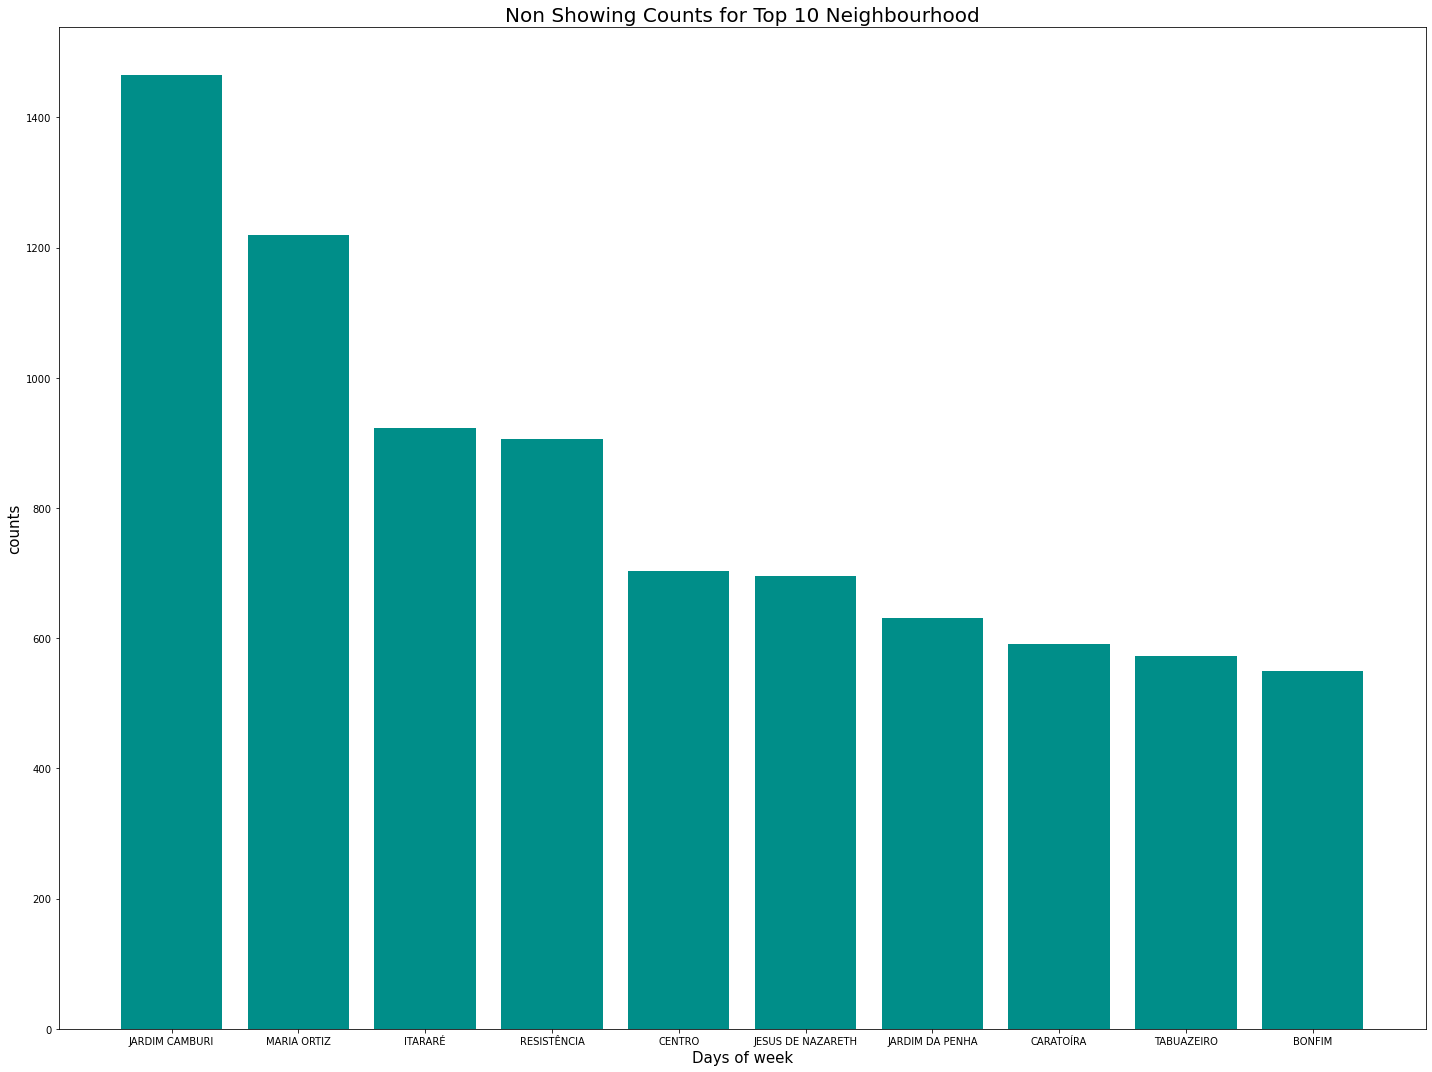

In [133]:
# make the graph for this question
plt.figure(figsize=(20,15))
plt.rcParams['font.size'] = 10.0
plt.bar(Non_Show_Neighoburhood.index,Non_Show_Neighoburhood,color='#008E89')
plt.xlabel('Days of week', size=(15) )
plt.ylabel('counts',size=(15))
plt.title('Non Showing Counts for Top 10 Neighbourhood',size  =(20))
plt.tight_layout()
plt.show()

**Jardim Camburi have the highest rate of neighborhood whose people don't show for the appointment**

<a id='conclusions'></a>
## Conclusions



### 1- Female tends to not showing in appointments than male by huge margin 

### 2- Old people have the greatest number of problems by huge margin then middle aged people then young people

### 3- Tuesday is the highest day for not showing for appointments

### 4- There is a positive relationship between the number of problems the patience have like diabetes and handicaps and the showing to the appointment for example the patience with 2 problem tends to show than the patience with one  

### 5- The patience with no problems have a great percent for not showing to the appointment 

### 6- SMS for appointment day has a great effect for increasing the probability the patience will attend the appointment

### 7- The patience who have scholarships don't likely miss the appointment while the non scholarship tends to not show

### 8- People with years range of 0:30 are the aged group who don't attend the appointments which are the young people who needs an Awareness 


### 9- Jardim Camburi have the highest rate of neighborhood whose people don't show for the appointment

### 10- Limitations:
<li> The data consist of 100 thousand data set of people which don't represent the all population
<li> The data set were on 2016 which is consider old nowadays which dont  represent the situation today
<li> The 0 in the  age years is not specific,it could be 6 months or 3 months which didn't give a clear number